# Time Series forecasting of NPS score
## Analysis of the dataset

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from statsmodels.distributions.empirical_distribution import ECDF

In [4]:
# matplotlib overrides
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 6
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"

In [5]:
#load the dataset save to DataFrame
df = pd.read_csv('Database1.csv')

This is how our dataset looks like:

In [6]:
df.head()

,Unnamed: 0,IMPACT,Likelihood To Recommend,Jan,Feb,Mar,Apr,May,Jun,Jul,...,Mar.3,Apr.3,May.3,Jun.3,Jul.3,Aug.3,Sep.3,Oct.3,Nov.3,Overall
0,Sample Size,32976,32976,17,17,367,552,307,361,496,...,1099,988,1042,1148,1118,586,872,1030,1451,32997.000000
1,Overall Satisfaction,0.070595052,0.070550124,-,-,-,-,-,-,-,...,6.885416667,7.131578947,7.193877551,6.72,7.424778761,7.488095238,7.552380952,7.489583333,6.69,6.787911
2,Understandability of Information,0.036293045,0.036269947,-,-,-,-,-,-,-,...,8,8.048,8.105769231,7.857142857,7.957627119,8.505617978,8.182608696,8.019230769,7.623853211,7.818733
3,Claims handling satisfaction,0.036210869,0.036187823,-,-,-,-,-,-,-,...,7.353535354,7.786885246,7.298076923,7.117647059,7.767857143,7.582417582,7.904347826,7.81372549,7.23364486,7.325077
4,Support and assistance satisfaction,0.036109393,0.036086412,-,-,-,-,-,-,-,...,7.90625,7.743801653,7.797979798,7.602040816,7.910714286,7.988888889,8.212389381,7.909090909,7.009708738,7.556395


We create a list with the categories, to save them, since they might be useful later

In [9]:
cats = np.array(df['Unnamed: 0']) 

The original datasets present the symbol '-' whenever a value is missing, this was causing some problems in deleting missing values since they were not recognized as null types

In [10]:
df = df.convert_objects(convert_numeric=True)

C:\Users\a_mon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


we delete the first column

In [11]:
del df['Unnamed: 0']

we transpose the entire dataset, so that now we have features as columns and the months as rows

In [12]:
dd = df.T

we make a copy so we can use that instead of using th original one, in case something happens

In [13]:
dd_1 = dd.copy()

Now we visualize the columns for a moment and the number of values they cointain:
    

In [14]:
for i in range(1,499):
    a = dd_1[i].count()
    print(i, cats[i],a)

1 Overall Satisfaction 43
2 Understandability of Information 43
3 Claims handling satisfaction 43
4 Support and assistance satisfaction 43
5 Speed of Requests 43
6 Expertise and Competence 43
7 Keeping promises 43
8 Helpfulness 43
9 Competitiveness of offering 22
10 OSAT Agency Support 22
11 Speed of answer 37
12 Friendliness of Employees 43
13 Responsiveness 37
14 Renewal strategy 22
15 Professionalism of Proama rep 22
16 Ability to reach required service 37
17 Sales campaigns 22
18 Marketing actions usefulness 37
19 Understanding needs 37
20 Commissions table 22
21 Technical quality of answers 37
22 Personal Lines - outlets, Buildings 22
23 Marketing actions ease of implementing 37
24 Claims Centre 22
25 Greeting and Listening 37
26 Easiness of claim resolution 22
27 Underwriting Centres 22
28 Empathy of Proama rep 22
29 Customer segmentation 22
30 Marketing actions info 37
31 Range of products 22
32 Motor 22
33 Corporate SME 22
34 Clarity of info 22
35 Time required 22
36 Personal L

344 Home insurance 6
345 Frequency of contacts 31
346 Ability to reach to regional sales team 16
347 Commisions 16
348 Range of products 16
349 Understanding your needs 16
350 Claims overall 16
351 Quality of contacts 31
352 Overall knowledge of our employees 16
353 Sales support tools 16
354 Frequency of contact 16
355 Training & Information 7
356 Overall satisfaction with product "Generali Einfach Privat" 7
357 Support from your main contact 16
358 Availability of your main contact 16
359 Overall satisfaction with MTPL 16
360 Overall satisfaction with [Life Product Name] 15
361 Contests / competitions / rewards 16
362 Overall satisfaction with CASCO 16
363 Policy Processing overall 16
364 Motor claims 16
365 Overall satisfaction with [Property Product Name] 16
366 Marketing Materials and information provided 16
367 System/Portal/App 16
368 Non-Life Individual 7
369 Offer proposal process 16
370 Policy Processing department 16
371 Competitivenes of Profi 15
372 Property claims 16
373 

Ideally we should have 49 values for each of these factors, however we see they are very diverse, some are duplicates (but maybe they belong to different survey of different business areas (?)), for some we even have more than 2 observations

What about the rows, i.e. months?

In [16]:
dd.apply(lambda x: x.count(), axis=1)

IMPACT                     454
Likelihood To Recommend    454
Jan                         17
Feb                         17
Mar                         46
Apr                         46
May                         46
Jun                         48
Jul                         64
Aug                         58
Sep                         95
Oct                        146
Nov                        227
Dec                        169
Jan.1                      154
Feb.1                      179
Mar.1                      216
Apr.1                      201
May.1                      209
Jun.1                      216
Jul.1                      216
Aug.1                      202
Sep.1                      204
Oct.1                      217
Nov.1                      168
Dec.1                      178
Jan.2                      211
Feb.2                      231
Mar.2                      213
Apr.2                      144
May.2                      181
Jun.2                      217
Jul.2   

In [17]:
likelihood = dd_1.loc[['Likelihood To Recommend']]
impact = dd_1.loc[['IMPACT']]

In [ ]:
dd_1 = dd.copy()

We start taking the first 8 

In [18]:
mon8 = dd_1[[1,2,3,4,5,6,7,8]].dropna()
mon8;

In [19]:
impact_8 = mon8.loc[['IMPACT']]
new_8 = mon8.drop(dd_1.index[[0,1,42]])
overal_8 = mon8.loc[['Overall']]
lk_8 = mon8.loc[['Likelihood To Recommend']]

In [20]:
dd_1.drop(dd_1.index[[0,1,49]]).to_csv('transposed_2.csv')

We'll plot the features all together in order to look for similarities. Why?
Similarity search can help us in:
    - Looking for the occurrence of known patterns
    - Discovering unknown patterns
    - Putting “things together” (clustering)
    - Classifiying new data
    - Predicting/extrapolating future behaviors

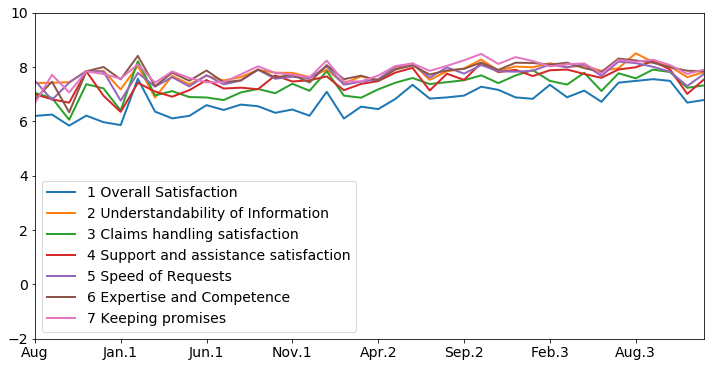

In [16]:
x=np.linspace(0,40,40)

for i in range(1,new_8.shape[1]):
    new_8[i].plot()

plt.ylim(-2,10)
plt.legend(['1 Overall Satisfaction','2 Understandability of Information','3 Claims handling satisfaction', 
            '4 Support and assistance satisfaction','5 Speed of Requests','6 Expertise and Competence',
            '7 Keeping promises','8 Helpfulness'])
plt.show()

As we can see they practically move together, at the beginning they're a bit different, then there is a peak in Jan. 2016 (Feb?) ...

Given two time series of equal length D, the usual way to measure their (dis-)similarity is based on Euclidean distance.
Let's compute the Euclidean distances to see if the Euclidean distance measure agrees with what our intuition tells us. Let's first create a function that computes the Euclidean distance between two time series.

In [17]:
def euclid_dist(t1,t2):
    return np.sqrt(sum((t1-t2)**2))

In [18]:
#the most similar are 3 and 4 (?), so we try to computer the eucl. distance between them
print(euclid_dist(new_8[3],new_8[4]))
#it's small, as expected

2.24890826293


In [19]:
#also 2 and 6 seem similar
print(euclid_dist(new_8[2],new_8[6]))

1.63279245343


However, directly comparing two time series (e.g., using Euclidean distance) might lead to counter-intuitive results, i.e.  the results might be "pessimistic". Is this true also in our case? We don't know (???????)

What we can do...

### Offset translation

Subtract from each sample the mean value of the series

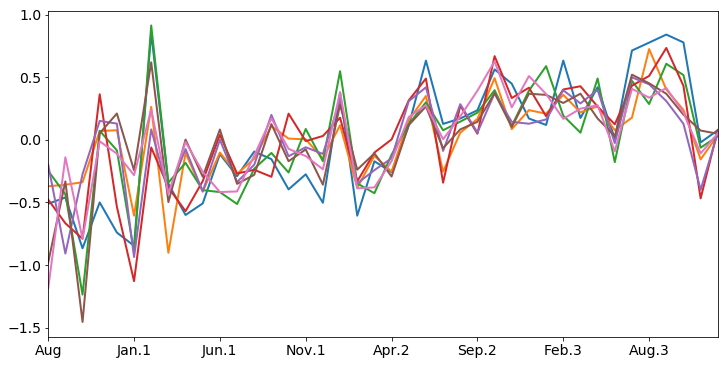

In [20]:
for i in range(1,new_8.shape[1]):
    (new_8[i] - np.mean(new_8[i])).plot()
plt.show()

### Amplitude scaling
Normalize the amplitude (divide by the standard deviation of the series)

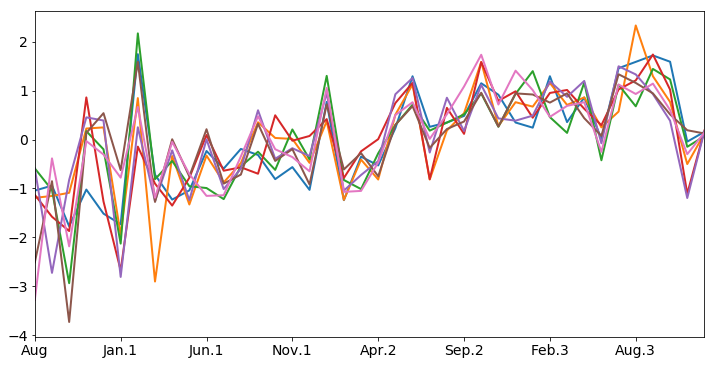

In [21]:
for i in range(1,new_8.shape[1]):
    ((new_8[i] - np.mean(new_8[i]))/np.std(new_8[i])).plot()
plt.show()

We can observe that there's an overall (but very small) increasing trend, and the time series is clearly not stationary, but let's look at the moving averages/variance.

We return the Empirical CDF of some of the variables as step functions

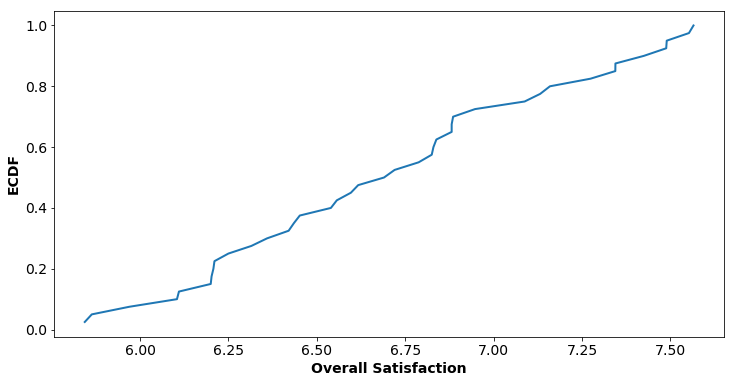

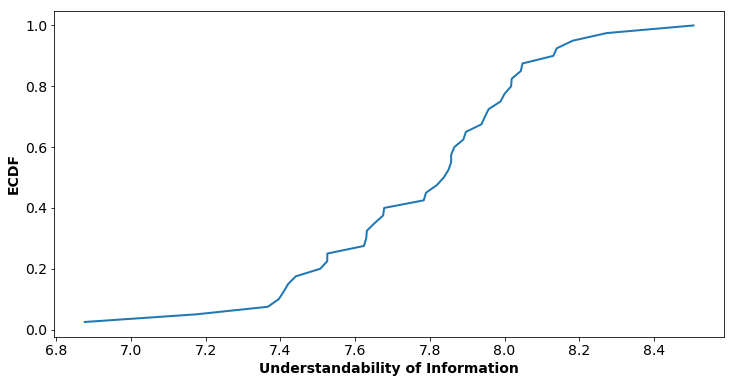

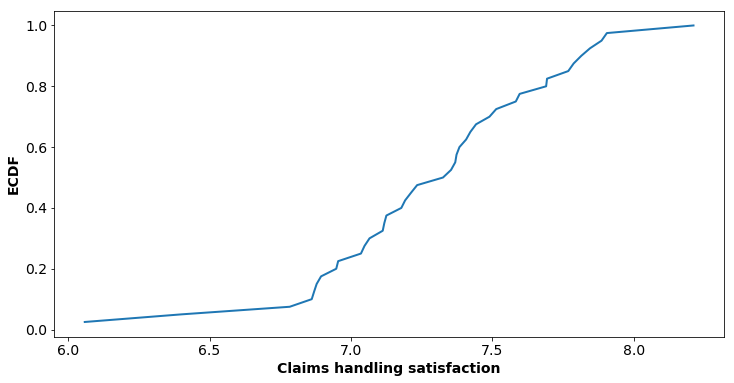

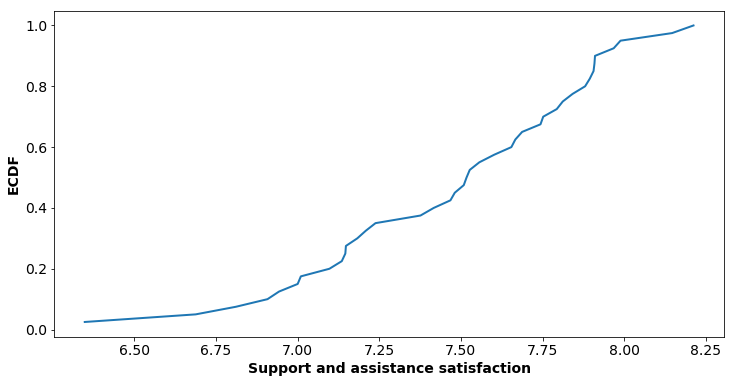

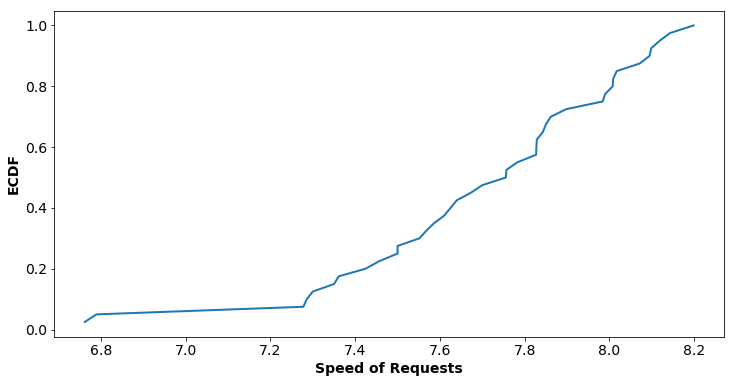

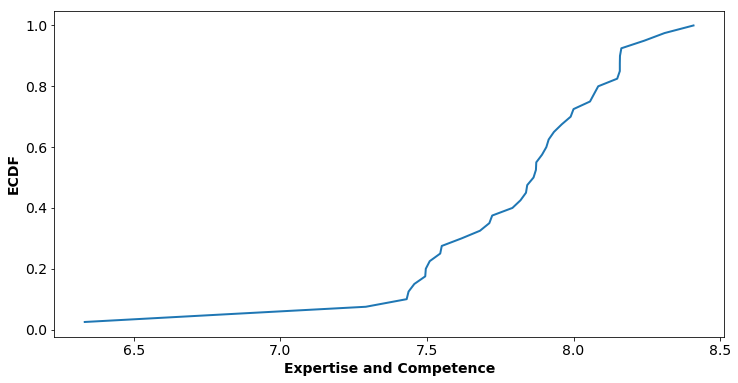

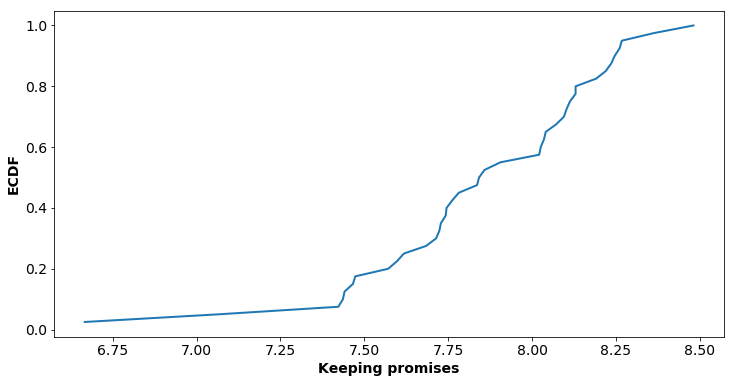

In [21]:
for i in range(1,new_8.shape[1]):
    cdf = ECDF(new_8[i])
    plt.plot(cdf.x, cdf.y, label = "statmodels");
    plt.xlabel(str(cats[i])); plt.ylabel('ECDF');
    plt.show()

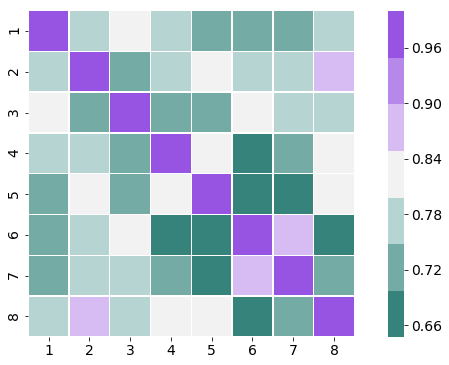

In [22]:
cmap=sns.diverging_palette(180,280,s=80,l=50,n=7)

sns.heatmap(new_8.corr(),
            square = True, linewidths = .5, cmap = cmap)      
plt.show()

Now we're going to perform a time series regression. 

We could perform ARIMA, but if we do that we'll get a forecast which simply the mean (?, anyway it's like a straight line) and we can check that by simply not putting the seasonal order in out SARIMAX model, which we'll see below.  

The SARIMAX is just the ARIMA which also considers the fact that data follow a seasonal trend, in our case this will be monthly (is this right????)  

{seasonal_order (iterable, optional) – The (P,D,Q,s) order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity. d must be an integer indicating the integration order of the process, while p and q may either be an integers indicating the AR and MA orders (so that all lags up to those orders are included) or else iterables giving specific AR and / or MA lags to include. s is an integer giving the periodicity (number of periods in season), often it is 4 for quarterly data or 12 for monthly data. Default is no seasonal effect.}

To fit the time series data to a seasonal ARIMA model with parameters $ARIMA(p, d, q)(P, D, Q)s$ the optimal parameters need to be found first. This is done via grid search, the iterative exploration of all possible parameters constellations. Since there is no way of doing this automatically in Python we have to resort to doing this ourselves.

Depending on the size of the model parameters $(p, d, q)(P, D, Q)s$ this can become an extremely costly task with regard to computation. We start of by generating all possible parameter constellation we'd like to evaluate.

In [23]:
import itertools
from sklearn.metrics import mean_squared_error

In [24]:
# define the p, d and q parameters to take any value between 0 and 2
p = d = range(0, 2)
q = range(0)

# generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2],12) for x in list(itertools.product(p, d, q))]

Actually, we skip the step above, i.e. splitting the data into training and testing because:  
https://stackoverflow.com/questions/44235558/statespace-sarimax-model-why-the-model-use-all-the-data-to-train-mode-and-pred


In [25]:
new_8.shape[1]

8

In [25]:
fit_models = []
for i in range(1,new_8.shape[1]):
    mdl = sm.tsa.statespace.SARIMAX(new_8[i],   
                                    order=(2, 0, 0),
                                    seasonal_order=(1, 0, 0, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False
                                   )
    fit_models.append(mdl.fit())

# print statistics
for i in range(len(fit_models)):
    print('This is the summary for the feature',cats[i+1])
    print(fit_models[i].aic)
    print(fit_models[i].summary())

C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsup

This is the summary for the feature Overall Satisfaction
27.5074897812
                                 Statespace Model Results                                 
Dep. Variable:                                  1   No. Observations:                   40
Model:             SARIMAX(2, 0, 0)x(1, 0, 0, 12)   Log Likelihood                  -9.754
Date:                            Mon, 10 Dec 2018   AIC                             27.507
Time:                                    13:58:46   BIC                             32.540
Sample:                                         0   HQIC                            28.957
                                             - 40                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5697      0.207      2.756

The output summary of SARIMAX gives us a significant amount of information, still the number of observation is pretty small but... , we'll focus our attention on the table of coefficients. The p-value for each coefficient is at least 0.005 so they're all significant.

The Ljung- Box test is a way to test for the absence of serial autocorrelation. 
We reject the null hypothesis and say that the model shows lack of fit if if

$Q > \chi^2_{1-\alpha, h} $

where $\chi^2_{1-\alpha, h}$  is the chi-square distribution table value with h degrees of freedom and significance level α. 

Because the test is applied to residuals, the degrees of freedom must account for the estimated model parameters so that h=m−p−q, where p and q indicate the number of parameters from the SARIMAX(p,q) model fit to the data. 

In [55]:
from scipy.stats import chi2
chi = chi2.isf(q=0.05, df=37)
chi

52.192319730102895

We can reject at the 5% level the null hypotheses of serial independence*  








*(just for overall)

We will now plot a grid with the following plots (ordered clockwise from top left):  

1) Standardized residuals over time  
2) Histogram plus estimated density of standardized residulas, along with a Normal(0,1) density plotted for reference.  
3) Normal Q-Q plot, with Normal reference line.  
4) Correlogram  


These are the plots for the feature Overall Satisfaction


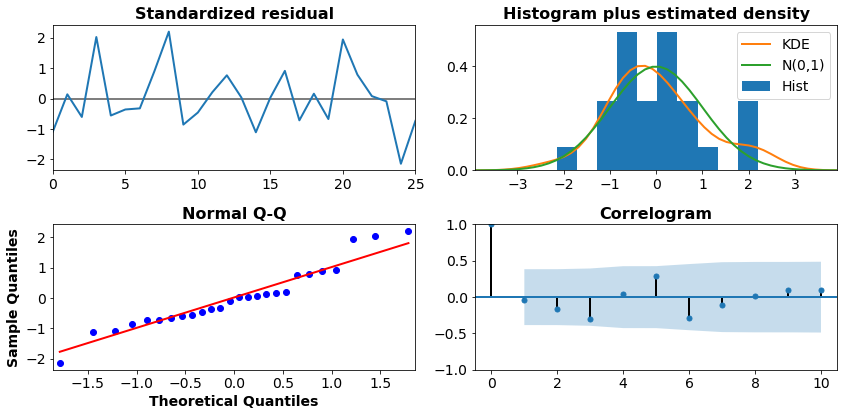

These are the plots for the feature Understandability of Information


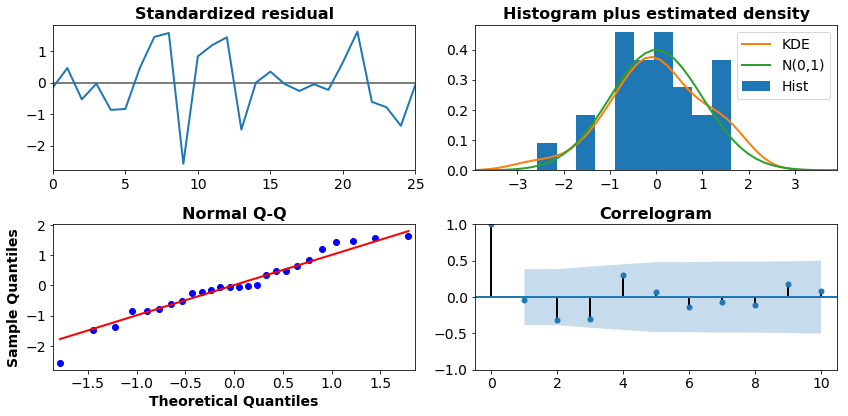

These are the plots for the feature Claims handling satisfaction


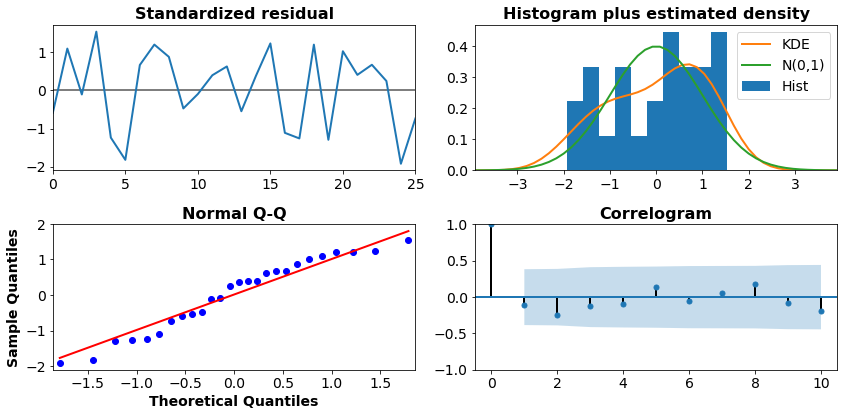

These are the plots for the feature Support and assistance satisfaction


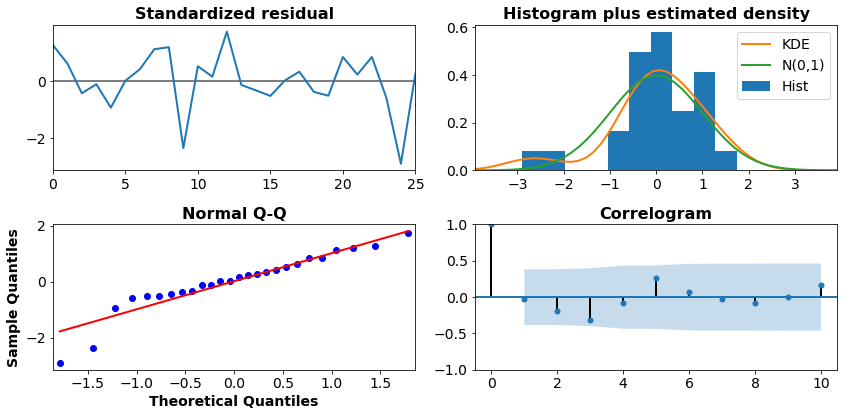

These are the plots for the feature Speed of Requests


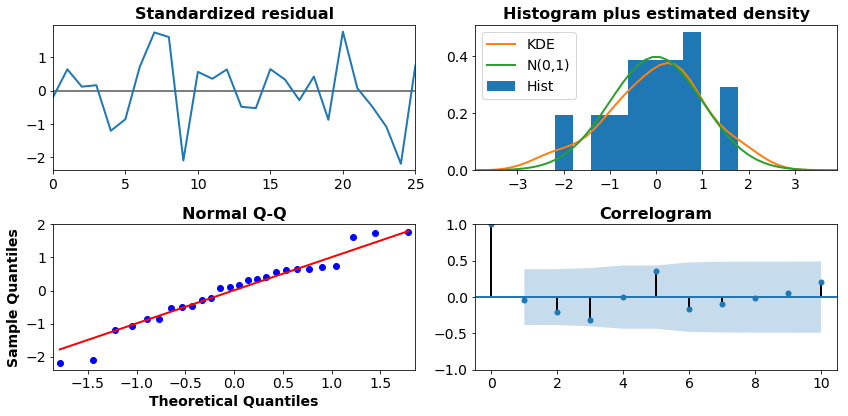

These are the plots for the feature Expertise and Competence


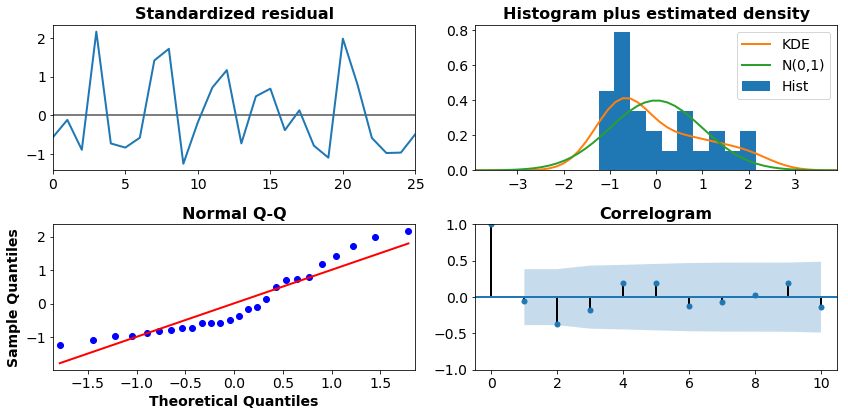

These are the plots for the feature Keeping promises


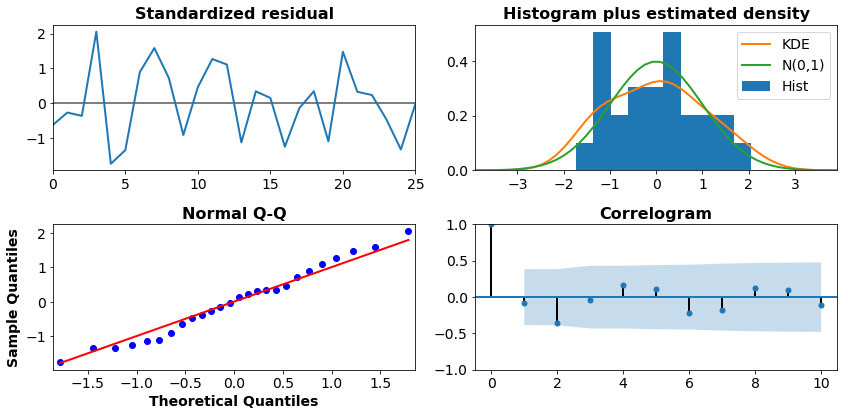

In [26]:
for i in range(len(fit_models)):
    print('These are the plots for the feature',cats[i+1])
    fit_models[i].plot_diagnostics()
    plt.tight_layout()
    plt.show()

1) Does the residual plot of the fitted model in the upper right corner appears do be white noise or does it display any trend behaviour? It goes up and then down and then a little up and a little down... It might be that it displays trends.  

2) The histogram shows that the distribution of the time series is "somewhat normally distributed" not really but at least it is centered at 0, so is not biased.

3) Correlation with residuals in the Correlogram:the correlations are low and don't seem to have a pattern.

This model appears to achieve a reasonably good fit. At this point, we can perform forecasting.

C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsup

This is variable Overall Satisfaction


C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


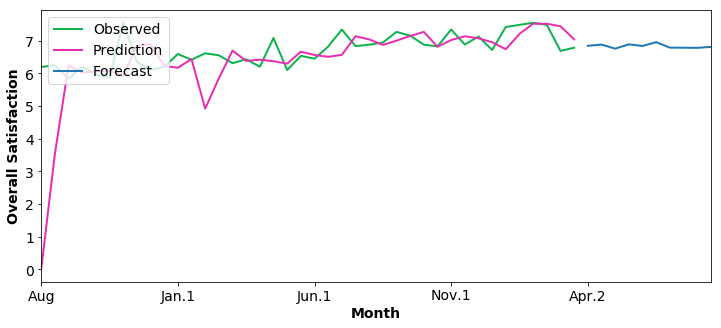

This is variable Understandability of Information


C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


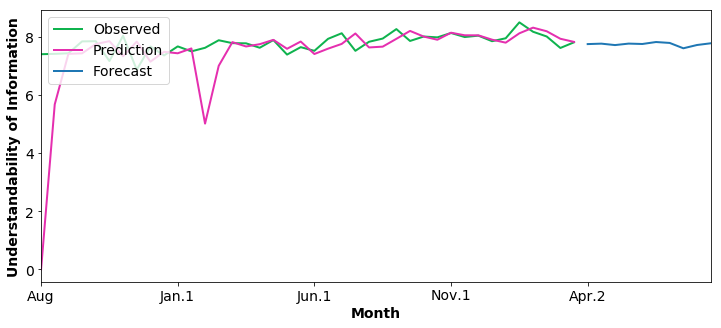

C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


This is variable Claims handling satisfaction


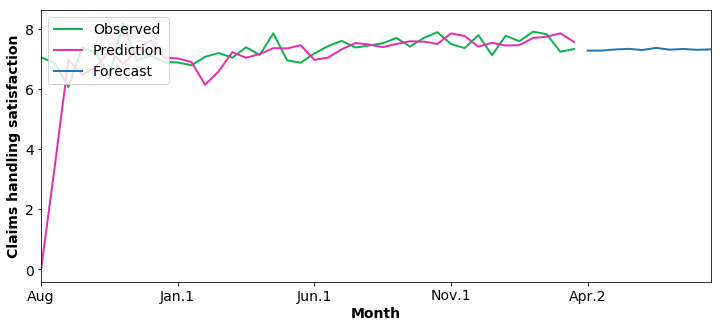

C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


This is variable Support and assistance satisfaction


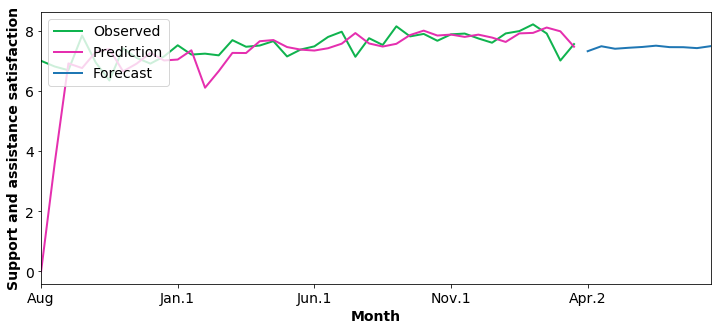

C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


This is variable Speed of Requests


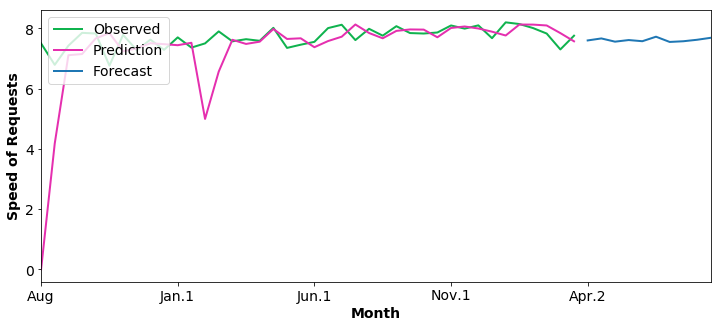

C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


This is variable Expertise and Competence


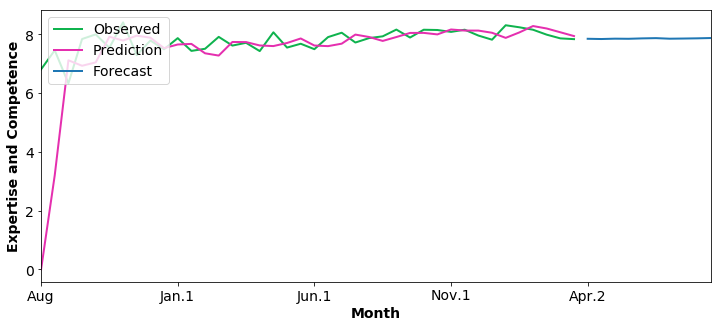

C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


This is variable Keeping promises


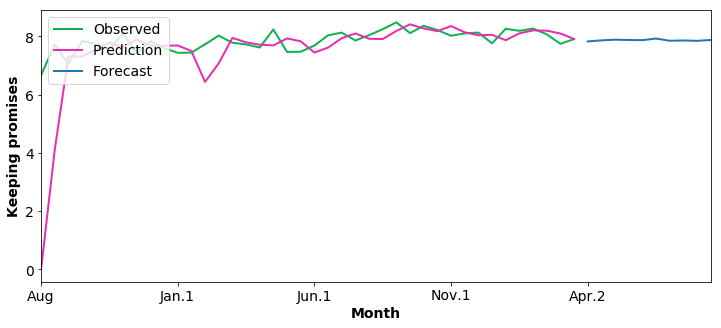

In [27]:
plt.figure(figsize = (16, 6))

# fit model to data
predictions = []
sar = []
for i in range(1,new_8.shape[1]):
    sar.append(sm.tsa.statespace.SARIMAX(new_8[i],
                                         order=(2, 0, 0),
                                         seasonal_order=(1, 0, 0, 12), #we operate with monthly data
                                         enforce_stationarity=False,
                                        enforce_invertibility=True).fit())
    #prediction
    predictions.append(sar[i-1].get_prediction(dynamic=False))
    
#    ci = predictions[i-1].conf_int()
#    print(ci)
    
# plot in-sample-prediction
for i in range(len(predictions)):
    plt.figure(figsize = (12, 5))
    ax = new_8[i+1]['Aug':].plot(label='Observed',color='#0fb34e');
    predictions[i].predicted_mean.plot(ax=ax, label='Prediction', color='#e52faf');
    sar[i].forecast(10).plot(ax=ax, label = 'Forecast')
#    ax.fill_between(predictions[i].predicted_mean.index, ci['lower 1'], ci['upper 1'])
    
        # style the plot
    ax.set_xlabel('Month');
    ax.set_ylabel(str(cats[i+1]));
    
    plt.legend(loc='upper left');
    print('This is variable', cats[i+1])
    plt.show()



*** plot the confidence interval for prediction

In [30]:
for i in range(len(predictions)):
    print(predictions[i].predicted_mean[1])
    

9.30000119924
11.1136373643
10.5714303275
10.5000010328
11.2500010528
10.2142869969
10.0000006931


In [31]:
#Actual values & predictions
for i in range(len(predictions)):
    print('  ')
    print('  ')

    print('This is variable', cats[i])
    
    print('september:', new_8[i+1][37], predictions[i].predicted_mean[37]) #september
    print('october:', new_8[i+1][38], predictions[i].predicted_mean[38]) #october
    print('november:', new_8[i+1][39], predictions[i].predicted_mean[39]) #november

# Close...
# Enough?? Try to optimize parameters, but later...

  
  
This is variable Sample Size
september: 7.489583333 7.60546290946
october: 6.69 7.29841154662
november: 6.787911206 6.10782019995
  
  
This is variable Overall Satisfaction
september: 8.019230769 7.98115793875
october: 7.623853211 7.7254332884
november: 7.818732643 7.67186901523
  
  
This is variable Understandability of Information
september: 7.81372549 8.2257779724
october: 7.23364486 7.69971920984
november: 7.325077399 6.75403945491
  
  
This is variable Claims handling satisfaction
september: 7.909090909 8.57662369794
october: 7.009708738 7.46454031608
november: 7.556394895 6.26997400871
  
  
This is variable Support and assistance satisfaction
september: 7.826923077 8.21921674986
october: 7.3 7.33439399205
november: 7.755561173 7.08452507505
  
  
This is variable Speed of Requests
september: 7.990196078 8.08480599199
october: 7.863636364 7.80292413161
november: 7.837899543 7.79486519988
  
  
This is variable Expertise and Competence
september: 8.072164948 8.34218055098

## Long term forecasting

Finally, a 3 year ahead forecast, leverageing a seasonal ARIMA model trained on the complete time series y. Grid search found the best model to be of form SARIMAX(2, 1, 3)(1, 2, 1)12 for the data vector overall

C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsup

This is variable Overall Satisfaction


C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


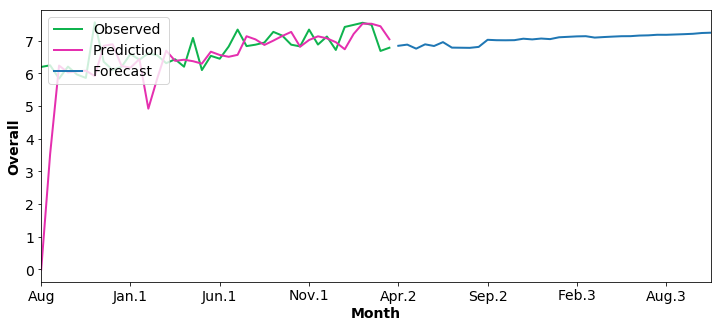

C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


This is variable Understandability of Information


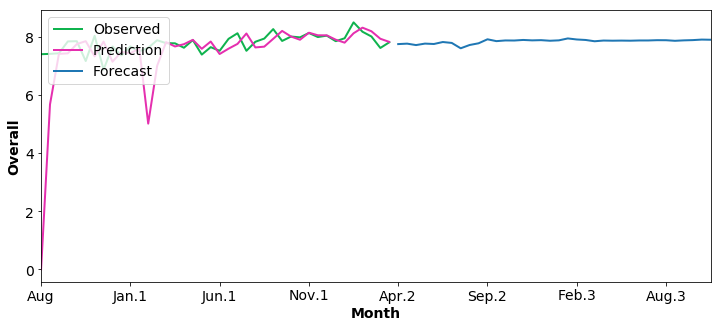

C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


This is variable Claims handling satisfaction


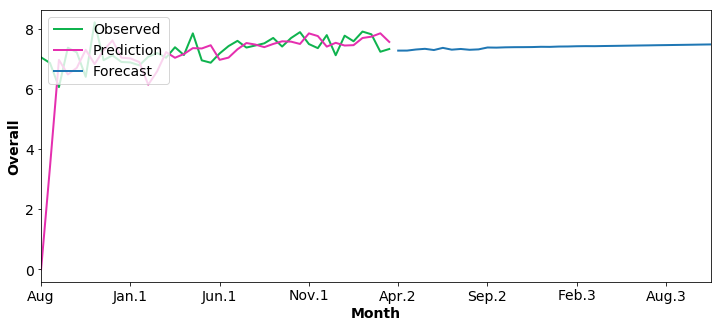

C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


This is variable Support and assistance satisfaction


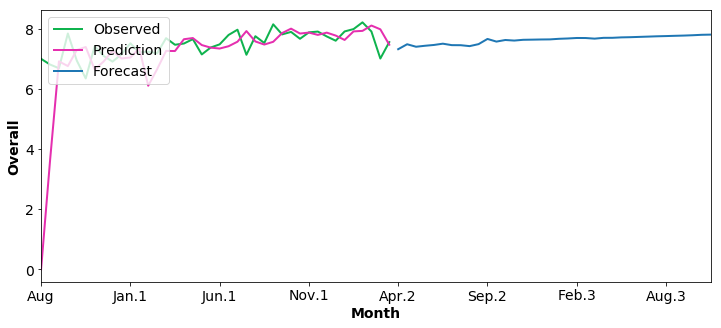

C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


This is variable Speed of Requests


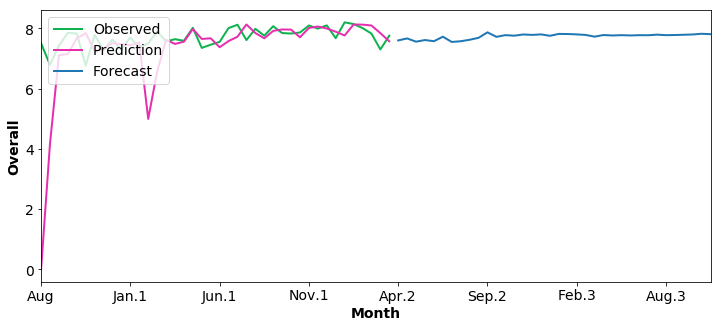

This is variable Expertise and Competence


C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


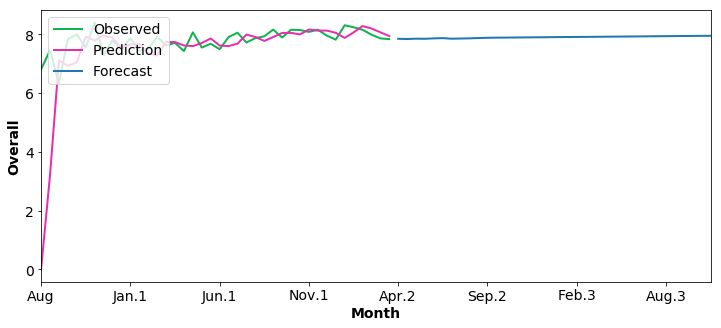

C:\Users\a_mon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


This is variable Keeping promises


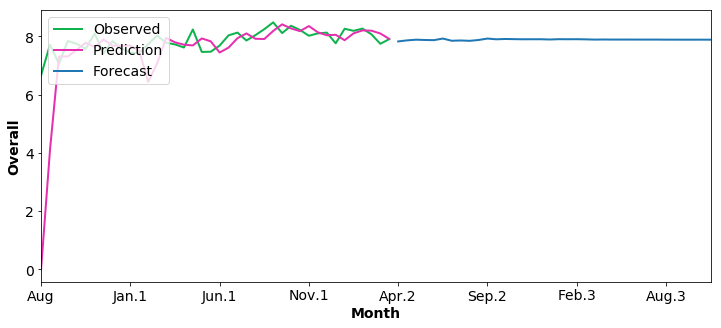

In [144]:
# fit model to data
predictions = []
sar = []
for i in range(1,new_8.shape[1]):
    sar.append(sm.tsa.statespace.SARIMAX(new_8[i],                                         
                                         order=(2, 0, 0),
                                         seasonal_order=(1, 0, 0, 12), #we operate with monthly data
                                         enforce_stationarity=False,
                                         enforce_invertibility=False
                                         ).fit())
    #prediction
    predictions.append(sar[i-1].get_prediction(dynamic=False))
    
#    ci = predictions[i-1].conf_int()
#    print(ci)
    
# plot in-sample-prediction
for i in range(len(predictions)):
    plt.figure(figsize = (12, 5))
    ax = new_8[i+1]['Aug':].plot(label='Observed',color='#0fb34e');
    predictions[i].predicted_mean.plot(ax=ax, label='Prediction', color='#e52faf');
    sar[i].forecast(36).plot(ax=ax, label = 'Forecast')
#    ax.fill_between(predictions[i].predicted_mean.index, ci['lower 1'], ci['upper 1'])
    
        # style the plot
    ax.set_xlabel('Month');
    ax.set_ylabel('Overall');
    
    plt.legend(loc='upper left');
    print('This is variable', cats[i+1])
    plt.show()
